In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("dataset/livros.csv")

df.head(3)

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN


In [ ]:
# Padronizando cores
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=["#6E5346"])

Início...


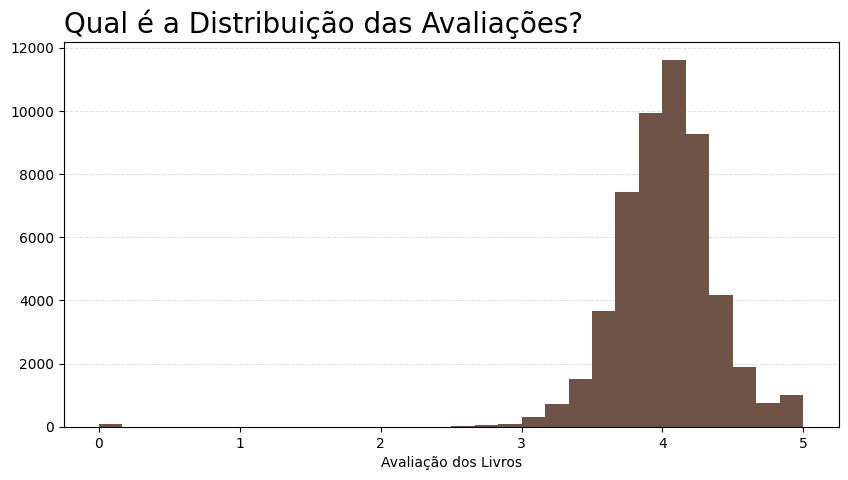

Fim.


In [63]:
# Criando gráfico para análisar a distribuição das avaliações dos livros em um geral
print("Início...")

# Configurando os gráficos
plt.figure(figsize=(10,5))
eixo_atual = plt.gca()
eixo_atual.set_axisbelow(True)
plt.grid(True, axis='y', linestyle='--', linewidth=0.7, alpha=0.4)
plt.hist(df["rating"], bins=30)
plt.xlabel("Avaliação dos Livros")
plt.title("Qual é a Distribuição das Avaliações?", loc='left', fontsize=20)

plt.show()
print("Fim.")

Início...


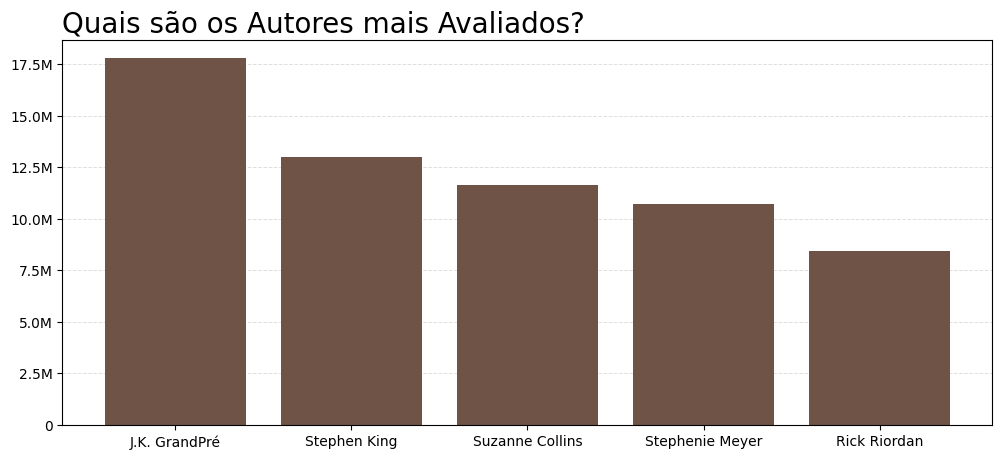

Fim.


In [ ]:
# Criando gráfico para análisar qual ator possuí mais avaliações
print("Início...")

# Encurtando os apelidos dos autores exclusivos do dataset coletado 
df["author"] = df["author"].str.replace(r"\(.*goodreads author.*\)", "", regex=True, case=False).str.strip()
df["author"] = df["author"].str.replace(r"\(.*illustrator.*\)", "", regex=True, case=False).str.strip()

# Encurtando os nomes muito longos (primeiro + último sobrenome)
def nome_menor(nome):
    partes = nome.split()
    if len(partes) <= 2:
        return nome
    return partes[0] + " " + partes[-1]

df["autor_nome_curto"] = df["author"].apply(nome_menor)


# Agrupando as tuplas com nomes dos autores repetidos e somando a sua quantidade de avaliações
autor_avaliado = df.groupby("autor_nome_curto")["numRatings"].sum().sort_values(ascending=False)

# Configurando os gráficos
plt.figure(figsize=(12,5))
eixo_atual = plt.gca()
eixo_atual.set_axisbelow(True)
plt.grid(True, axis='y', linestyle='--', linewidth=0.7, alpha=0.4)
plt.bar(autor_avaliado.index[:5], autor_avaliado.values[:5])
plt.title("Quais são os Autores mais Avaliados?", loc='left', fontsize=20)


# Para evitar uma notação cientifica automatica do matplotlib
# Foi formatado o eixo y com separador de milhares
def sem_notacao_cientifica(x, pos):
    if x >= 1e6:
        return f"{x/1e6:.1f}M"
    if x >= 1e3:
        return f"{x/1e3:.0f}k"
    return f"{int(x)}"
plt.gca().yaxis.set_major_formatter(FuncFormatter(sem_notacao_cientifica))

plt.show()
print("Fim.")

Início...


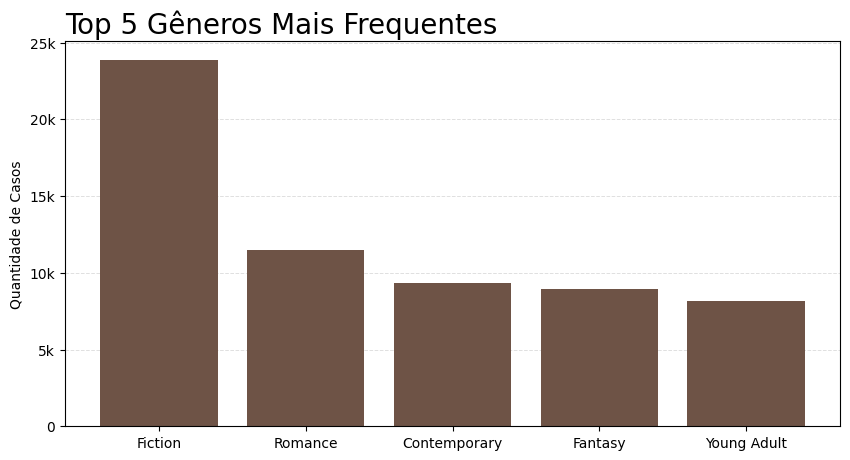

Fim.


In [ ]:
# Criando gráfico para análisar qual gêneros são mais frequentes nos livros
print("Início...")

# Separando os gêneros da suas respectiva listas
generos_separado= df["genres"].str.split(",").explode().str.strip()
generos_contados = generos_separado.value_counts().head(5)
generos_tratado = generos_contados

# remove aspas simples dos nomes
generos_tratado.index = generos_tratado.index.str.replace("'", "", regex=False)

# Configurando gráfico
plt.figure(figsize=(10,5))
eixo_atual = plt.gca()
eixo_atual.set_axisbelow(True)
plt.grid(True, axis='y', linestyle='--', linewidth=0.7, alpha=0.4)
plt.bar(generos_tratado.index, generos_contados.values)
plt.ylabel("Quantidade de Casos")
plt.title("Top 5 Gêneros Mais Frequentes", loc='left', fontsize="20")

# Chamando a função criada anteriormente
plt.gca().yaxis.set_major_formatter(FuncFormatter(sem_notacao_cientifica))

plt.show()
print("Fim.")